<a href="https://colab.research.google.com/github/mvish7/PyTorch/blob/master/playing_around_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**video 16**
getting comfortable with dataset and dataloader classes
getting to know the data

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
trainset=torchvision.datasets.FashionMNIST(root='./data/FashionMNIST', train=True, download=True,transform=transforms.Compose([transforms.ToTensor()]))

0it [00:00, ?it/s]

26427392it [00:04, 5782161.81it/s]                              


Extracting ./data/FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

32768it [00:00, 38392.08it/s]                           
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz


4423680it [00:02, 1673177.37it/s]                             
0it [00:00, ?it/s]

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


8192it [00:00, 12975.38it/s]            

Extracting ./data/FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!




---


wrapping the above downloaded data into a data loader class

In [0]:
train_loader=torch.utils.data.DataLoader(trainset, batch_size=10) #when not specified the batch size is 1

doing some operations to better understand data

In [0]:
import numpy as np
import matplotlib.pyplot as plt

torch.set_printoptions(linewidth=120) # setting the linewidth of to print data

In [9]:
len(trainset)#checking length of data

60000

In [11]:
trainset.targets #checking thr labels of the data

tensor([9, 0, 0,  ..., 3, 0, 5])

In [13]:
trainset.targets.bincount() #finding the number of images per class,  each class is considered as a bin . As all the classes have equal samples this dataset is balanced, otherwise 
                            #oversampling is the best option to make classes balanced.

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

accessing one sample of the data

In [0]:
  sample=next(iter(trainset))

passing the trainset to iter fun of python gives us the object representing stream of the data, which we can then iterate over

In [15]:
len(sample)

2

In [16]:
type(sample)

tuple

this dataset contains the images-lable pair as a one sample. so length of one sample is 2. Using sequence unpacking we unpack the sample of data

In [0]:
image, label= sample

In [18]:
image.shape #image is having one channel and 28*28 shape and label is a scalar tensor which has no shape

torch.Size([1, 28, 28])

label: 9


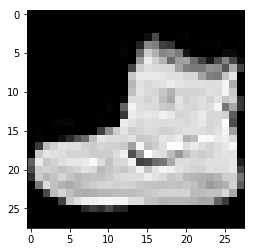

In [21]:
plt.imshow(image.squeeze(),cmap='gray')  #squeezing the colour channel access, colormap is gray coz it is grayscale image
print('label:', label)

now lets work with batches and dataloader 

In [0]:
batch =next(iter(train_loader)) #we are passing the train_loader not trainset

In [26]:
len(batch)

2

In [27]:
type(batch)

list

In [0]:
images, labels= batch #as bacth size was 10 we should expect different tensor shape here

In [30]:
images.shape #10 images in a batch, having 1 color channel and 28*28 resol

torch.Size([10, 1, 28, 28])

In [31]:
labels.shape

torch.Size([10])

plotting all 10 images from a batch at once

labels: tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5])


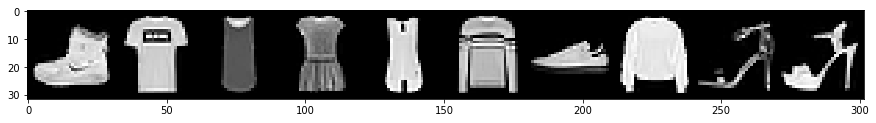

In [43]:
grid= torchvision.utils.make_grid(images, nrow=10) #nrow specifies the no. of images in each row

plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))

print('labels:',labels)